# **PHÁT HIỆN TỪ NGỮ THÔ TỤC, XÚC PHẠM TRONG CÁC BÌNH LUẬN**


#**1. Mô tả bài toán**

##Đặt vần đề


  Theo khảo sát mới được công bố của Microsoft, Việt Nam nằm trong top 5 quốc gia có chỉ số mức độ văn minh thấp nhất trên không gian mạng (DCI).

  Mặc dù kết quả khảo sát này bất lợi cho hình ảnh cộng đồng mạng Việt Nam nhưng nó không tạo nên làn sóng phản đối từ người dùng. Theo khảo sát trên Zing.vn, 87% bạn đọc đồng tình với việc Microsoft xếp Việt Nam vào top 5 những nước hành xử kém văn minh trên Internet.

![Việt Nam đứng top 5 nước có hành xử trên Internet kém văn minh nhất.](https://media.tinmoi.vn/resize_650x417/upload/thanhdat/2020/02/22/080738-internet-viet-nam-2.jpg)

                                              Ảnh Zingvn

  Tuy vậy, vẫn có nhiều người phản đối kết quả của Microsoft. Trong đó, bình luận chủ tài khoản Facebook có tên Koba Yashi đến từ Việt Nam được chia sẻ rộng rãi nhất như một minh chứng rõ cho kết quả khảo sát.

**"Thấp cái ***** *******, căn cứ vào đâu để đánh giá chứ"


## Bài toán cần giải quyết

> Bài toán cần được giải quyết ở đây đó chính là phát hiện được những câu bình luận mang tính xúc phạp, thô tục, ... từ đó để xuất với nhà phát triển nhằm mục đích xóa những bình luận ấy.

> Input: một câu bình luận bất kì (thường lấy ở các bài post của những cá nhân bị ghét, ném đá nhiều)

> Output: Xuất ra 1 nếu câu binh luận mang tính xúc phạm, thô tục và xuất ra 0 nếu ngược lại. 



#**2. Mô tả về bộ dữ liệu**

###Cách thu thập bộ dữ liệu
  + Lấy tất cả các bình luận trong các bài viết gây xôn xao cộng đồng mạng
  + Lấy dữ liệu là comment trên facebook bằng cách crawl dữ liệu (cách crawl data và source code em để trên github)



###Số lượng  
- 4764 bình luận, trong đó 2121 bình luận mang tính thô tục, xúc phạm và số còn lại là những bình luận bình thường.



###Phân chia
75% dùng để làm training data, 25% còn lại dùng để làm test data, dev data được thu thập thêm ở ngoài sau khi training xong 




###Các thao tác tiền xử lý dữ liệu: 
  + Cleaning data: là bước làm sạch dữ liệu trước khi bắt đầu bất kì xử lý nào trên tập dữ liệu của chúng ta, nó bao gồm một số khái niệm của xử lý ngôn ngữ tự nhiên như loại bỏ Stop Words (Năng cao: kiểm tra chính tả chẳng hạn)

  + Words segmentation hay còn gọi là tách từ, là bước cực kỳ quan trọng và phức tạp đặc biệt là đối với Tiếng Việt.

- Chi tiết tiền xử lý dữ liệu:
  + Các comment thường viết hoa viết thường rất lung tung, nên em sẽ chuyển tất các các bình luận về dạng lower case.
  + Chuyển các chữ cái các bạn trẻ hiện nay thường kéo dài về dạng nguyên mẫu (vd: nguuuuuuuuuuuuuu --> ngu)
  + Loại bỏ dấu câu và các ký tự đặc biệt
  + Loại bỏ các icon không có ý nghĩa
  
  + Xử lý mất cân bằng dữ liệu:
  > Under sampling
    Under sampling là việc ta giảm số lượng các quan sát của nhóm đa số để nó trở nên cân bằng với số quan sát của nhóm thiểu số. Ưu điểm của under sampling là làm cân bằng mẫu một cách nhanh chóng, dễ dàng tiến hành thực hiện mà không cần đến thuật toán giả lập mẫu.

     > Tuy nhiên nhược điểm của nó là kích thước mẫu sẽ bị giảm đáng kể. Gỉa sử nhóm thiểu số có kích thước là 500, như vậy để tạo ra sự cân bằng mẫu giữa nhóm đa số và thiểu số sẽ cần giảm kích thước mẫu của nhóm đa số từ 10000 về 500. Tổng kích thước tập huấn luyện sau under sampling là 1000 và chiếm gần 1/10 kích thước tập huấn luyện ban đầu. Tập huấn luyện mới khá nhỏ, không đại diện cho phân phối của toàn bộ tập dữ liệu và thường dễ dẫn tới hiện tượng overfitting.
     --> không sử dụng cách này

    > Over sampling
    Là các phương pháp giúp giải quyết hiện tượng mất cân bằng mẫu bằng cách gia tăng kích thước mẫu thuộc nhóm thiểu số bằng các kĩ thuật khác nhau.


In [1]:
# import các thư viện cần thiết
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.tree import DecisionTreeClassifier

import pandas as pd 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#tải dữ liệu lên
csv_file = open('/content/drive/MyDrive/data-label1.csv')
names = ['cmt', 'is_profane']
data = pd.read_csv(csv_file, names = names)
data.head(10)


,cmt,is_profane
0,Em đang xả với 1xx+freship ai qtam ib em nhé,0
1,"1 số đặt đc lần nhiều đơn hả mọi người, tưởng ...",0
2,Ác quá🙄,0
3,Mấy thằng ngu dốt mà tại sao gọi bọn nó là nhà...,1
4,Ác thật 😔,0
5,Ác vl,1
6,ad cứ để số đt ra ko cần che. Cho nó hết dùng ...,0
7,Ae chánh ta,0
8,Anh Chun có phải trò này mày chuyên làm ko hả ?,0
9,Anh Nguyen mượn đt làm vài đơn Now,0


In [5]:
X = data['cmt']
Y = data['is_profane']


In [6]:
X

0            Em đang xả với 1xx+freship ai qtam ib em nhé
1       1 số đặt đc lần nhiều đơn hả mọi người, tưởng ...
2                                                 Ác quá🙄
3       Mấy thằng ngu dốt mà tại sao gọi bọn nó là nhà...
4                                               Ác thật 😔
                              ...                        
5297    Chúc kênh panba dc nhiều sub nha yêu thầy dấu ...
5298    Quỳnh Hương thật, t tưởng nó viết thiếu dấu nặ...
5299    Nguyễn Thị Duyên vậy thì làm sao vượt qua sóng...
5300                   Bạn chả có máu hóa văn loz j cã=]]
5301    Nhok Lầy: địt mẹ hay thì mày share đi. Nhai đi...
Name: cmt, Length: 5302, dtype: object

In [7]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
5297    0
5298    1
5299    0
5300    1
5301    1
Name: is_profane, Length: 5302, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


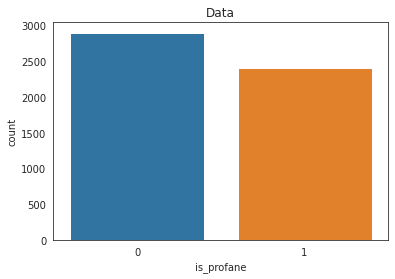

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")
sns.countplot(Y).set_title('Data')
plt.show()

#**3. Mô tả về đặc trưng**

Feature Extraction: bước tìm ra được các tinh hoa từ tập dữ liệu ban đầu. Ở bài toán này là các từ ngữ mang tính xúc phạm, thô tục như: đm, vcl, đĩ, ngu, ... và tần suất xuất hiện của các từ đó

Vector hóa văn bản (câu comment đầu vào). Ở đây em sẽ sử dụng TF-IDF



  

  


##TF-IDF (Term Frequency – Inverse Document Frequency) 
Là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu. Một vài biến thể của tf-idf thường được sử dụng trong các hệ thống tìm kiếm như một công cụ chính để đánh giá và sắp xếp văn bản dựa vào truy vấn của người dùng. TF-IDF cũng được sử dụng để lọc những từ stopwords trong các bài toán như tóm tắt văn bản và phân loại văn bản.

##Tách từ (Words segmentation)
Là một bước quan trọng bậc nhất trong xử lý ngôn ngữ tự nhiên. Tiếng Việt không đơn giản như tiếng anh vì nó có thêm các từ ghép. Trong tiếng anh, thường thi mỗi từ sẽ được ngăn cách bởi dấu cách với các từ khác, nhưng trong tiếng Việt thì lại khác. Ví dụ: từ "Đất nước" nếu không sử dụng tách từ hợp lý thì nó sẽ biết thành 2 từ, nhưng dùng tách từ thì nó sẽ là "Đất_nươc".
  
  Ví dụ:
  temp = "Chào các bạn tôi là một sinh viên công nghệ thông tin"
    
  print NLP(text=temp).segmentation()

  ->>>Chào các bạn tô là một sinh_viên công_nghệ_thông_tin

In [9]:
# Tách từ
!pip install pyvi
from pyvi import ViTokenizer
class NLP(object):
    def __init__(self, text = None):
        self.text = text
        #self.set_stopwords()

    def segmentation(self):
        return ViTokenizer.tokenize(self.text)


     |████████████████████████████████| 8.5 MB 7.7 MB/s 
     |████████████████████████████████| 743 kB 49.4 MB/s 


In [10]:
# Loại bỏ các ký tự đặc biệt
import re, string

def clean_text(text):
  if type(text) != str:
    return
  else:
    text = text.lower()
    text = re.sub('\[.*?]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
  return text 

##Xóa bỏ stopword 
   
   Hãy tưởng tượng rằng ngôn ngữ của chúng ta giống như một đống gạo bị lẫn với thóc. Việc cần làm của trích chọn đặc trưng đó chính là chọn ra các hạt gạo chất lượng tốt nhất từ đống thóc đó. Những hạt thóc đó được gọi là stop words tức là những từ không có ý nghĩa lắm đối với việc phân loại của chúng ta.
   Stopwords em lấy từ https://github.com/NguyenVanHieuBlog/vietnamese-stopwords/blob/master/stopwords.txt và có bổ sung thêm nhiều từ nữa để tối ưu bài toán em đang giải quyết.


In [11]:
# upload stopword
sw =  open('/content/drive/MyDrive/stopword.txt')
data_sw = sw.readlines()
data_sw = [x.strip() for x in data_sw]

# hàm loại stopword

def del_stopword(txt):
    t = clean_text(txt)
    if t == '':
        return
    t = NLP(text=t).segmentation()
    t = t.split()
    tt = t
    for x in tt:
      if x in data_sw:
        t.remove(x)
    return t

In [12]:
n = len(X)
for i in range(n):
    X[i] = del_stopword(X[i])
    #X[i] = ' '.join(X[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
print(n)

5302


In [14]:
for i in range(n):
    #X[i] = del_stopword(X[i])
    X[i] = ' '.join(X[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#**4. Mô tả về thuật toán máy học**


Trong phần thuật toán này, em sẽ sử dụng một số thuật toán sau để có cái nhin tổng quan xem thuật toán nào phù hợp với model nhất.
- Naive Bayes
- Logistic Regression
- LinearSVC
- Decision Tree Classifier

##Logistic Regression
Phương pháp hồi quy logistic là một mô hình hồi quy nhằm dự đoán giá trị đầu ra rời rạc (discrete target variable) y ứng với một véc-tơ đầu vào x. Việc này tương đương với chuyện phân loại các đầu vào x vào các nhóm y tương ứng.

##Naive Bayes

##LinearSVC

#**5. Cài đặt, tinh chỉnh tham số**

In [15]:
'''model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = LinearSVC()
model4 = DecisionTreeClassifier()
'''
# split test:25%, train:75%
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.25,random_state=42)

# initialize TfidfVectorizer
# size of vocab: 50000
# min_df: ignore terms that have a document frequency strictly lower than the given threshold
tf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)

# transform words to vetor
trainX = tf.fit_transform(trainX.values).toarray()
trainVocab = tf.vocabulary_ 
tf = TfidfVectorizer(vocabulary=trainVocab)
testX = tf.fit_transform(testX.values).toarray()

print(trainVocab)

{'chúc_mừng': 448, 'ae': 5, 'nguyễn': 2646, 'tô': 3936, 'hc': 1413, 'mấy': 2406, 'thằng': 3622, 'chốt': 543, 'chặn': 498, 'đéo': 4651, 'cứ': 938, 'nó': 2974, 'chạy': 469, 'ầm_ầm': 4927, 'đua': 4583, 'xe': 4263, 'tông': 3941, 'chết': 504, 'ng': 2571, 'kiểu': 1757, 'đi': 4487, 'gì': 1348, 'mang_tiếng': 2182, 'mấy thằng': 2413, 'cứ nó': 939, 'stt': 3349, 'đoạn': 4578, 'là': 1957, 'chủ': 571, 'bánh': 134, 'tất_cả': 3972, 'mn': 2223, 'chúc': 447, 'sn': 3340, 'bạn': 182, 'đâu': 4645, 'chỉ': 522, 'cảm_ơn': 877, 'người': 2668, 'thôi': 3575, 'có': 786, 'cũng': 831, 'sai': 3299, 'chủ bánh': 572, 'thế': 3640, 'thì': 3559, 'chẳng': 494, 'đường': 4716, 'em_em': 1188, 'tôi': 3937, 'gởi': 1397, 'chồng': 545, 'khen': 1659, 'tánh': 3886, 'anh': 22, 'này': 2934, 'vậy': 4201, 'tốt': 4009, 'ca': 292, 'đôi': 4678, 'thế thì': 3644, 'chẳng gì': 496, 'đi đường': 4542, 'trash': 3758, 'bêddee': 154, 'bêddee đi': 155, 'mũi': 2354, 'to': 3713, 'cả': 867, 'ngưu': 2666, 'mũi to': 2379, 'tắt': 3981, 'mịa': 2493, 'ơi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


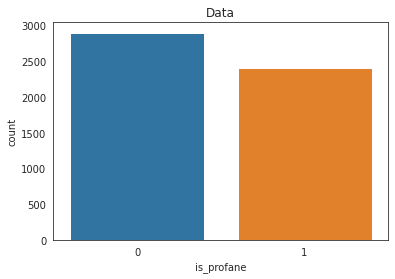

In [16]:
%matplotlib inline
sns.set_style("white")
sns.countplot(Y).set_title('Data')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


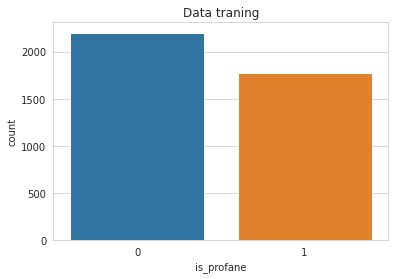

In [17]:
%matplotlib inline
sns.set_style("whitegrid")
sns.countplot(trainY).set_title('Data traning')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


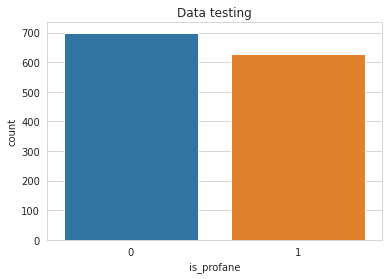

In [18]:
%matplotlib inline
sns.set_style("whitegrid")
sns.countplot(testY).set_title('Data testing')
plt.show()

#**6. Đánh giá kết quả, kết luận**

In [19]:
print("[INFO] Used TfidfVectorizer ... ")

for i in range(4):
    
    if i == 2:
        model = LogisticRegression()
        print("   [INFO] evaluating Logistic Regression...")

    if i == 0:
        model = LinearSVC()
        print("   [INFO] evaluating SVC...")
    
    if i == 1:
        model = MultinomialNB()
        print("   [INFO] evaluating Naive Bayes...")
    if i ==3:
        model = DecisionTreeClassifier()
        print("   [INFO] evaluating Decision Tree Classifier...")
    
    # train and evaluating 
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    print(classification_report(testY,predictions))

[INFO] Used TfidfVectorizer ... 
   [INFO] evaluating SVC...
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       699
           1       0.89      0.79      0.84       627

    accuracy                           0.86      1326
   macro avg       0.86      0.85      0.85      1326
weighted avg       0.86      0.86      0.85      1326

   [INFO] evaluating Naive Bayes...
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       699
           1       0.90      0.66      0.76       627

    accuracy                           0.80      1326
   macro avg       0.83      0.80      0.80      1326
weighted avg       0.82      0.80      0.80      1326

   [INFO] evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       699
           1       0.91      0.72      0.81       627

    accuracy                           0.

In [20]:
def processing(text):
    text = clean_text(text)
    text = del_stopword(text)
    text = ' '.join(text)
    text = tf.fit_transform([text])
    return text
    

In [22]:
# Hàm kết luận comment có thô tục xúc phạm hay không
def result(text):
    text = processing(text)
    predict = model.predict(text)

    if predict == 1:
      print("câu bình luận thô tục, xúc phạm")
    else:
      print('Câu bình luận bình thường')

In [23]:
text = "mày ngu quá vậy trời"
print(result(text))

câu bình luận thô tục, xúc phạm
None


In [24]:
# Lưu lại model
import joblib
filename = '/content/drive/MyDrive/18520427.sav'
joblib.dump(model, filename)

['/content/drive/MyDrive/18520427.sav']

In [29]:
# load the model from disk

loaded_model = joblib.load('/content/drive/MyDrive/18520427.sav')
text = 'm ngu lắm'
text = processing(text)
predict = loaded_model.predict(text)

print(predict)
#result = loaded_model.score(X_test, Y_test)
#print(result)

[1]
